<a href="https://colab.research.google.com/github/keyom-ai/multimodal/blob/main/gpt_4_image_text_speech_mount_rushmore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# update or install the necessary libraries
!pip install --upgrade openai
!pip install --upgrade langchain
!pip install --upgrade python-dotenv
!pip install pillow

In [2]:
import os
import IPython
from langchain.llms import OpenAI
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Audio

In [20]:
import openai
os.environ["OPENAI_API_KEY"]='sk-abcdefghijklmnopqrstuvwxyz'
openai.api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    api_key=os.getenv("openai.api_key"))

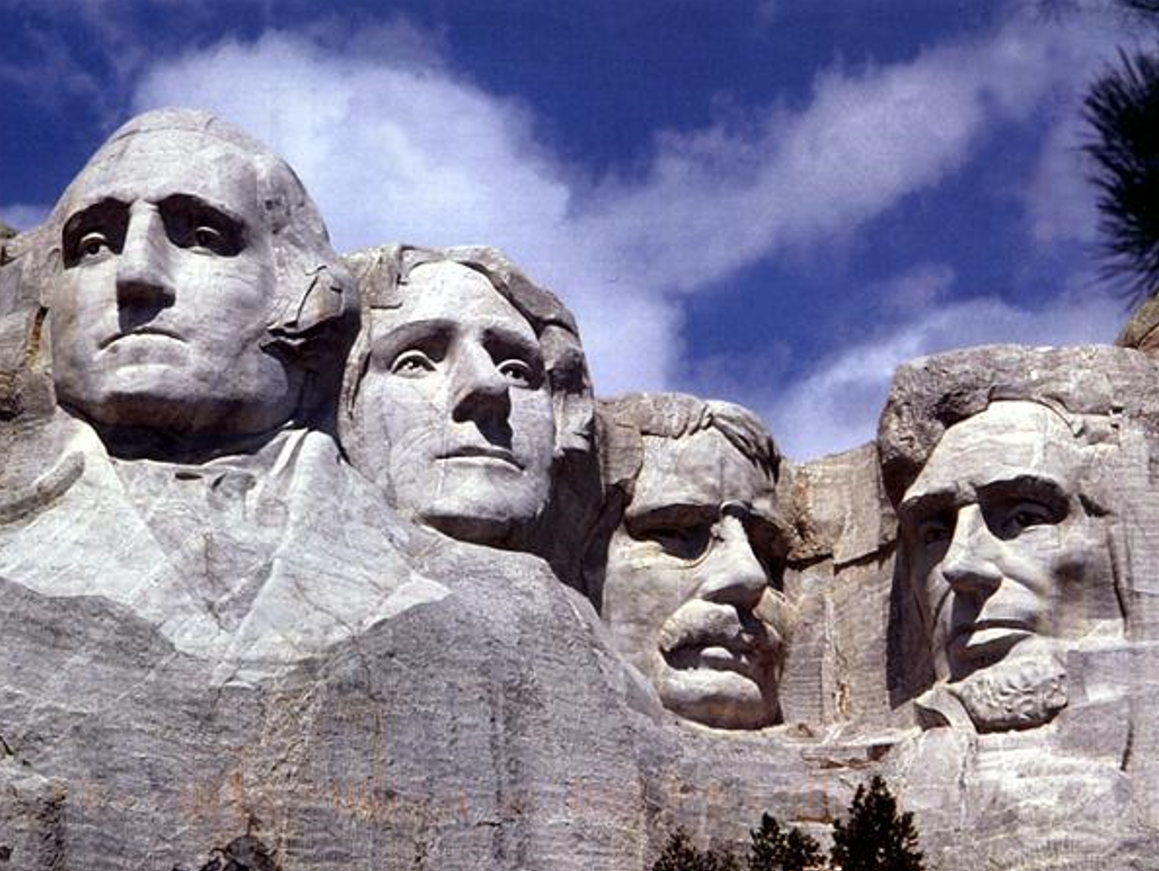

In [10]:
import urllib.request

from PIL import Image


image_path = '/content/mount_rushmore.png'

img = Image.open(image_path)

display(img)

In [19]:
import base64
import requests
import json

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = '/content/mount_rushmore.png'

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {openai.api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()  # Parse JSON response into a dictionary

    # Access 'choices' key
    if 'choices' in response_data:
        choices = response_data['choices']
        if choices and len(choices) > 0:
            content = choices[0].get('message', {}).get('content', '')
            print(content)
        else:
            print("No choices found in the response.")
    else:
        print("'choices' not found in the response.")
else:
    print("Failed to get a valid response", response.status_code)

text_to_speech = content

The image shows the Mount Rushmore National Memorial, a colossal sculpture carved into the granite face of Mount Rushmore in the Black Hills region of South Dakota, United States. It features the 60-foot heads of four United States presidents from left to right: George Washington, Thomas Jefferson, Theodore Roosevelt, and Abraham Lincoln. This monument is an iconic symbol of the United States and represents the first 150 years of American history.


In [16]:
import base64
import requests
import json

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = '/content/mount_rushmore.png'

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {openai.api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What's the historical significance of the person in the image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()  # Parse JSON response into a dictionary

    # Access 'choices' key
    if 'choices' in response_data:
        choices = response_data['choices']
        if choices and len(choices) > 0:
            content = choices[0].get('message', {}).get('content', '')
            print(content)
        else:
            print("No choices found in the response.")
    else:
        print("'choices' not found in the response.")
else:
    print("Failed to get a valid response", response.status_code)

text_to_speech = content

The image shows Mount Rushmore, a famous monumental sculpture located in the Black Hills region of South Dakota, United States. Carved into the granite face of Mount Rushmore are the heads of four United States presidents, each of whom played a significant role in American history. From left to right, the presidents depicted are George Washington, Thomas Jefferson, Theodore Roosevelt, and Abraham Lincoln.

- George Washington was the first President of the United States and is often considered the "Father of His Country" for his pivotal role in founding the nation.
- Thomas Jefferson was the third President and the principal author of the Declaration of Independence, and he also made significant contributions to the expansion of the United States through the Louisiana Purchase.
- Theodore Roosevelt, the 26th President, is remembered for his progressive policies, conservation efforts, and strong leadership during the early 20th century.
- Abraham Lincoln, the 16th President, preserved t

In [17]:
speech_file_path =  "mount.mp3"
response = client.audio.speech.create(
  model="tts-1",
  voice="alloy",
  input=text_to_speech
)

In [18]:
response.stream_to_file(speech_file_path)
Audio(speech_file_path)